Author: Pia Rautenstrauch
Date: 3rd of September, 2024

Application of batch removal metrics on real data.

Data: NeurIPS 2021 BMMC data with nested batch effects

- Uncorrected (None)
- Mild batch correction by highly variable gene selection (Suboptimal)


In [1]:
import scanpy as sc
import anndata as ad
import scib
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ad.OldFormatWarning)

In [3]:
model = 'noIntegration_minimal_example'

In [4]:
adata = ad.read_h5ad('data/original/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad')

/fast/AG_Ohler/prauten/conda_envs/scib_no_defaults/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


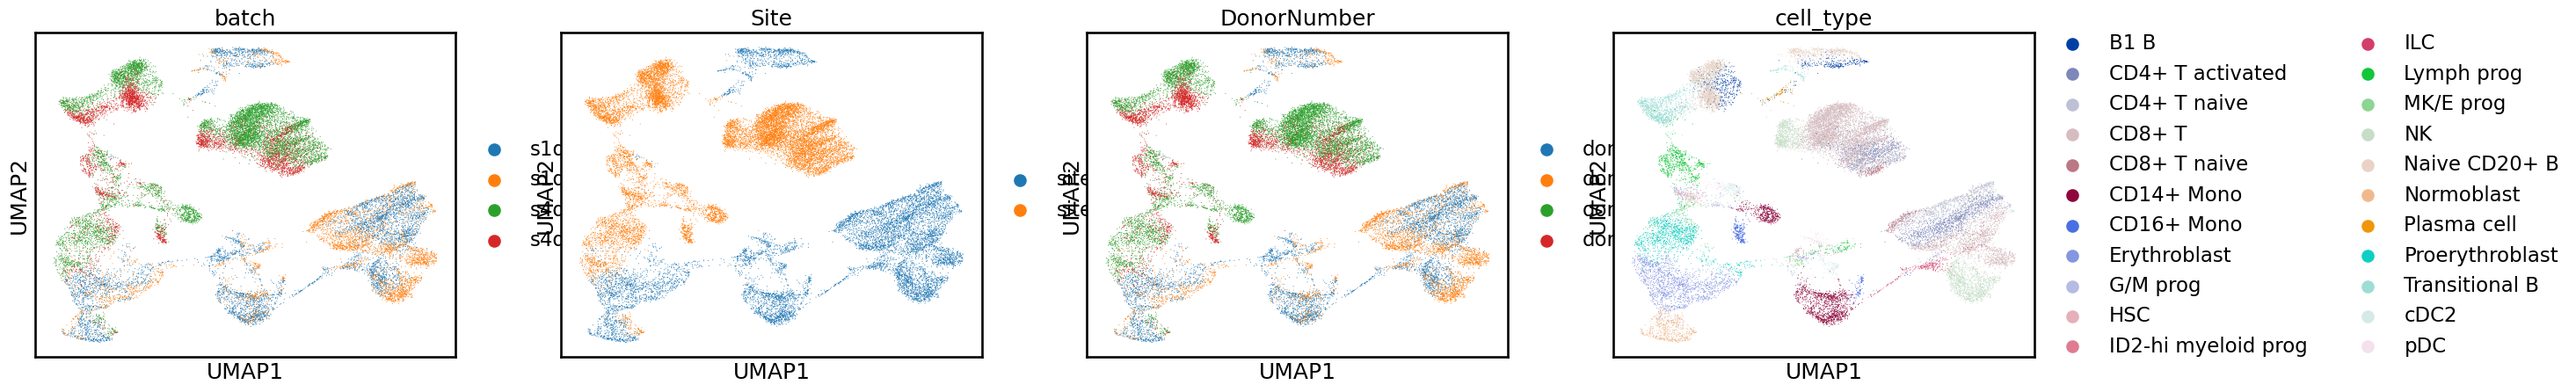

In [5]:
adata = adata[:,adata.var['feature_types'] == 'GEX'].copy()
adata.X = adata.layers['counts']
adata = adata[(adata.obs['Samplename'] == 'site1_donor1_multiome') | (adata.obs['Samplename'] == 'site1_donor3_multiome') | (adata.obs['Samplename'] == 'site4_donor8_multiome') | (adata.obs['Samplename'] == 'site4_donor9_multiome')].copy()

# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

sc.pl.umap(
    adata,
    color=["batch", "Site", 'DonorNumber', 'cell_type'],
    size=2,
)

In [6]:
# Save embedding
embedding = ad.AnnData(
    X=adata.obsm['X_pca'],
    obs=adata.obs,
    uns={
        'dataset_id': adata.uns['dataset_id'],
        'method_id': model,
    }
)
embedding.write_h5ad("embeddings/{}.embedding.h5ad".format(model), compression="gzip")

In [7]:
model = 'naiveIntegration_minimal_example'

In [8]:
adata = ad.read_h5ad('data/original/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad')

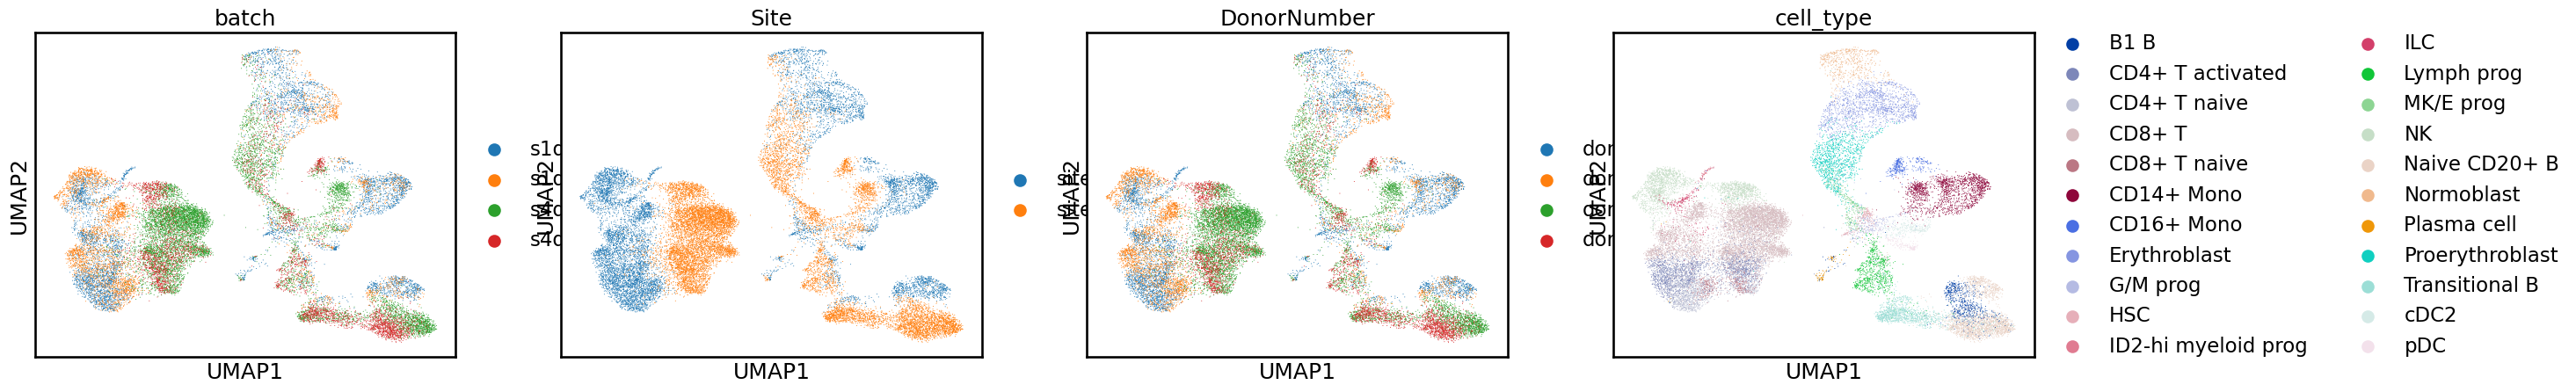

In [9]:
adata = adata[:,adata.var['feature_types'] == 'GEX'].copy()
adata.X = adata.layers['counts']
adata = adata[(adata.obs['Samplename'] == 'site1_donor1_multiome') | (adata.obs['Samplename'] == 'site1_donor3_multiome') | (adata.obs['Samplename'] == 'site4_donor8_multiome') | (adata.obs['Samplename'] == 'site4_donor9_multiome')].copy()

# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

# Mild batch correction by batch-aware selection of highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="batch")

sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

sc.pl.umap(
    adata,
    color=["batch", "Site", 'DonorNumber', 'cell_type'],
    size=2,
)

In [10]:
# Save embedding
embedding = ad.AnnData(
    X=adata.obsm['X_pca'],
    obs=adata.obs,
    uns={
        'dataset_id': adata.uns['dataset_id'],
        'method_id': model,
    }
)
embedding.write_h5ad("embeddings/{}.embedding.h5ad".format(model), compression="gzip")